# Compartments

Compartments are detected on the full genome matrix

In [46]:
from pytadbit.parsers.hic_parser import load_hic_data_from_reads
from cPickle import load

In [19]:
%matplotlib inline

In [3]:
reso = 300000
base_path = 'results/both/03_filtering/valid_reads12.tsv'
bias_path = 'results/both/04_normalizing/biases_{0}.pick'
bads_path = 'results/both/04_normalizing/bad_columns_{0}.pick'

In [6]:
def my_load_hic_data(reso):
    hic_data = load_hic_data_from_reads(base_path, resolution=reso)
    hic_data.bias = load(open(bias_path.format(reso)))
    hic_data.bads = load(open(bads_path.format(reso)))
    return hic_data

In [8]:
hic_data = my_load_hic_data(reso)

In [9]:
! mkdir -p results/fragment/both/05_segmenting

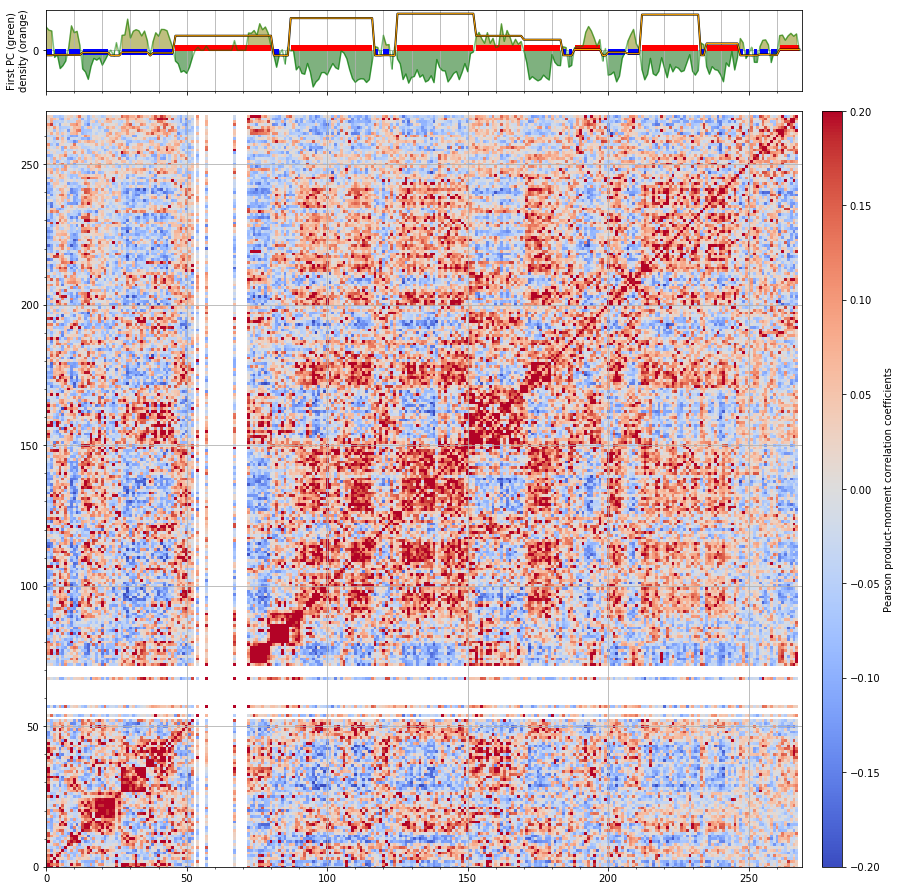

ValueError: list.remove(x): x not in list

In [31]:
crm = 'chr18'
corr = hic_data.find_compartments(
        show=True, crms=[crm], vmin=-0.2, vmax=0.2, label_compartments='none',
        savedata='results/fragment/both/05_segmenting/compartments_{0}_{1}.tsv'.format(crm, reso))

In [32]:
! head -n 20 results/fragment/both/05_segmenting/compartments_chr2_300000.tsv

## CHR chr2	Eigenvector: 1
#start	end	density	type
chr2	0	2	0.08	
chr2	3	4	0.03	
chr2	5	5	0.01	
chr2	6	8	0.07	
chr2	9	12	0.14	
chr2	13	22	1.03	
chr2	23	23	0.01	
chr2	24	27	0.12	
chr2	28	38	0.90	
chr2	39	39	0.01	
chr2	40	41	0.03	
chr2	42	50	0.64	
chr2	51	51	0.01	
chr2	52	54	0.07	
chr2	55	55	0.01	
chr2	56	65	0.72	
chr2	66	68	0.08	
chr2	69	77	0.68	


# TADs

In [35]:
from pytadbit import Chromosome

In [37]:
crm = Chromosome('18')
crm.add_experiment('HindIII', 
                   hic_data='results/HindIII/04_normalizing/100000_raw/chr18.mat', 
                   norm_data='results/HindIII/04_normalizing/100000_norm/chr18.mat',
                   resolution=100000)
crm.add_experiment('MboI', 
                   hic_data='results/MboI/04_normalizing/100000_raw/chr18.mat',
                   norm_data='results/MboI/04_normalizing/100000_norm/chr18.mat',
                   resolution=100000)

/home/student/.miniconda2/lib/python2.7/site-packages/pytadbit/parsers/hic_parser.py:247: UserWarning: WARNING: matrix not symmetric: summing cell_ij with cell_ji
  warn('WARNING: matrix not symmetric: summing cell_ij with cell_ji')


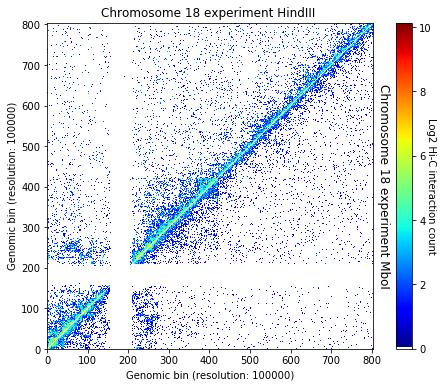

In [38]:
crm.visualize([('HindIII', 'MboI')])

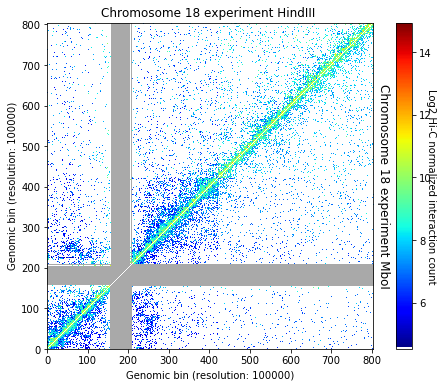

In [39]:
crm.visualize([('HindIII', 'MboI')], normalized=True)

In [41]:
crm.find_tad(['HindIII', 'MboI'], n_cpus=8)

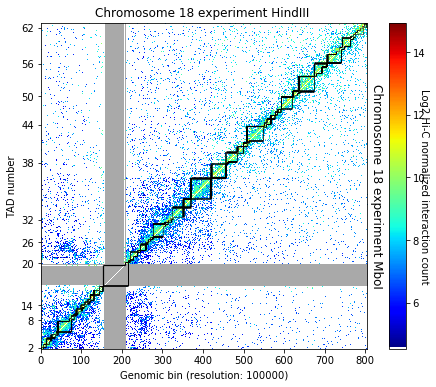

In [42]:
crm.visualize([('HindIII', 'MboI')], normalized=True, paint_tads=True, )

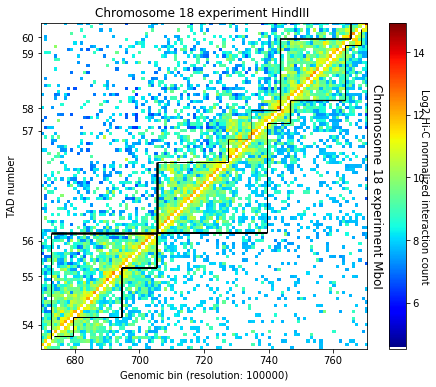

In [43]:
crm.visualize([('HindIII', 'MboI')], normalized=True, paint_tads=True, focus=(670, 770))

In [44]:
crm.experiments

[Experiment HindIII (resolution: 100 kb, TADs: 57, Hi-C rows: 804, normalized: visibility),
 Experiment MboI (resolution: 100 kb, TADs: 62, Hi-C rows: 804, normalized: visibility)]

In [47]:
ali = crm.align_experiments()

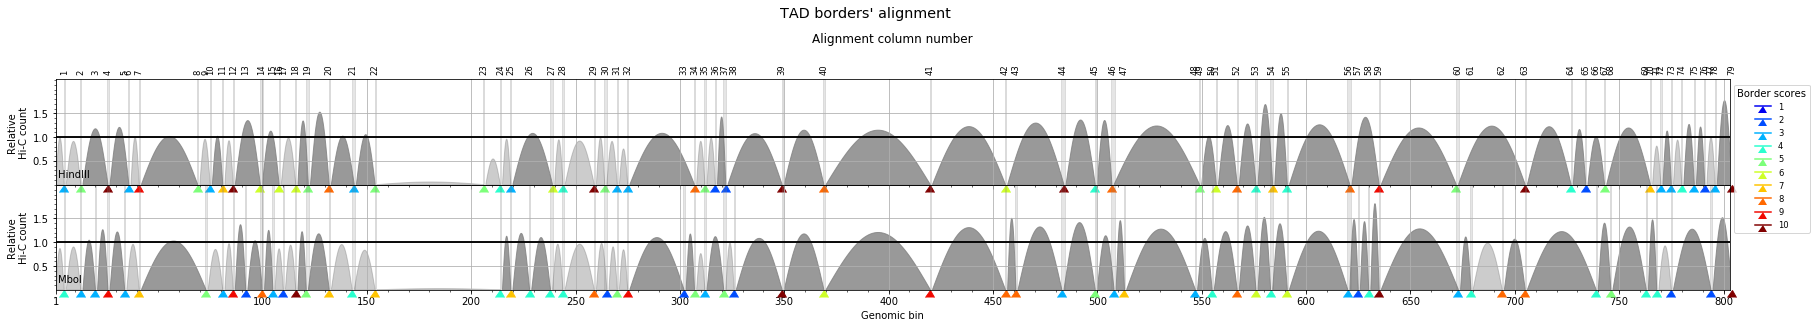

In [48]:
ali.draw()

## Save Chromosome object (with TAD definition)

In [45]:
crm.save_chromosome('results/crm18.tdb')